In [1]:
#데이터 로드
#df_result.csv (day_rate, female_rate이 각각 1개인 파일)로 실행해주세요!

df= pd.read_csv("df_result.csv", encoding='euc-kr')

### inf, NAN값 없애기

In [2]:
%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

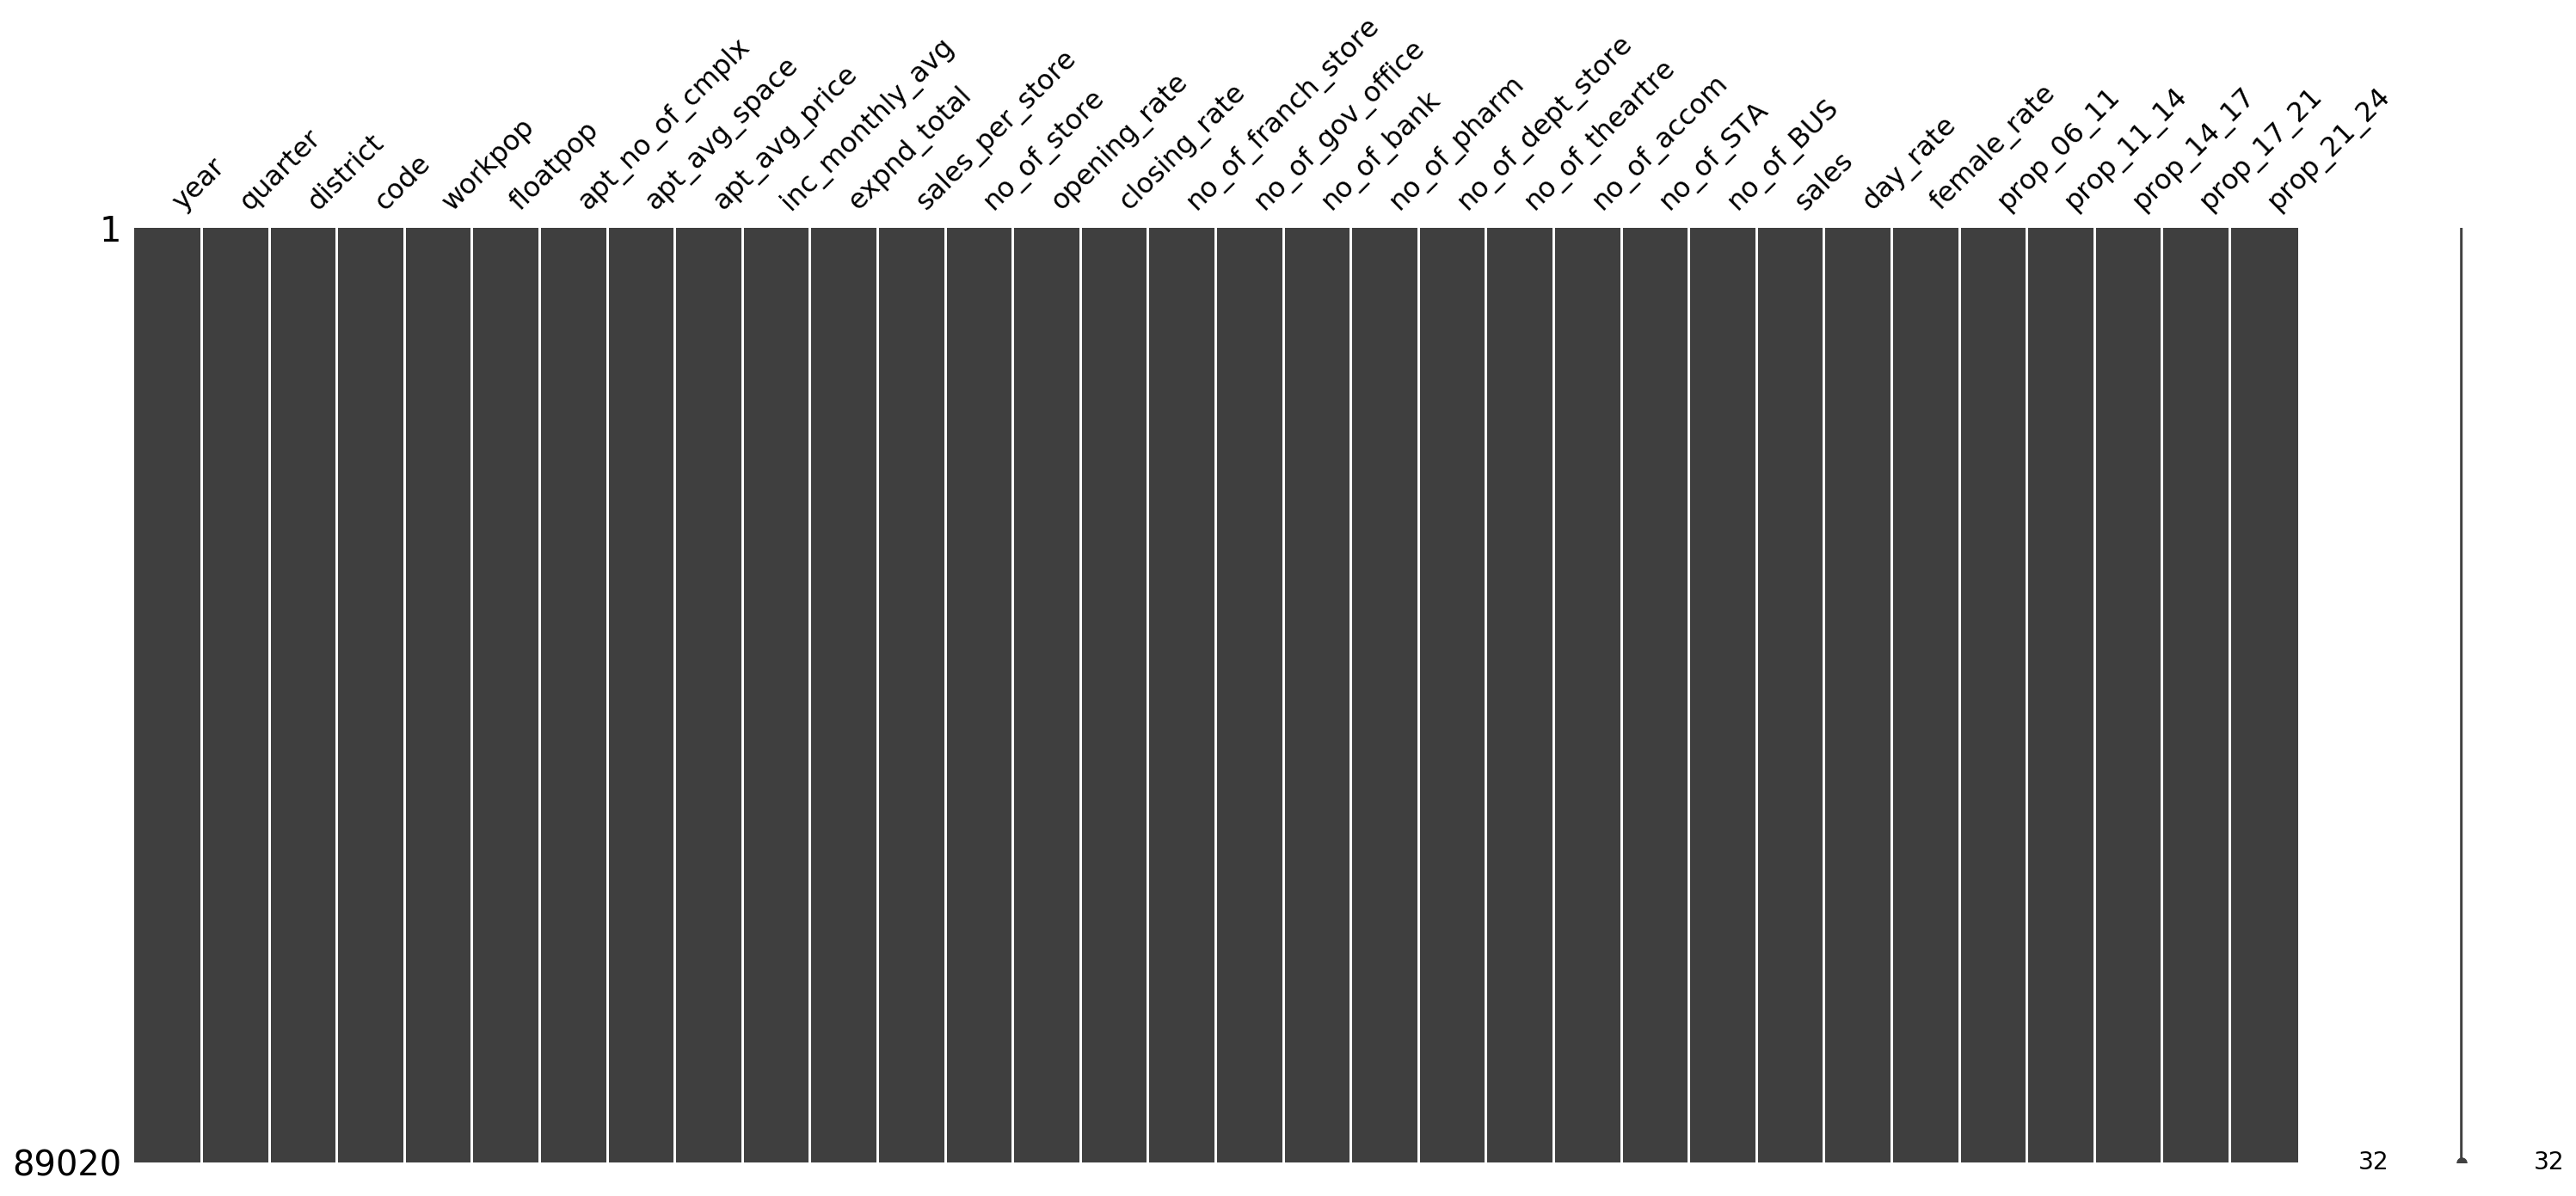

In [4]:
import missingno as msno
msno.matrix(df)
plt.show()

In [5]:
#inf가 있는 행이 있는지 확인
import math
for col in df.columns :
    inf_row=df[df[col]==math.inf]
inf_row

,year,quarter,district,code,workpop,floatpop,apt_no_of_cmplx,apt_avg_space,apt_avg_price,inc_monthly_avg,...,no_of_STA,no_of_BUS,sales,day_rate,female_rate,prop_06_11,prop_11_14,prop_14_17,prop_17_21,prop_21_24


#### EDA 결과
- 0이 있는 값은 지우지 않고 그대로 쓰기로 했다(더이상 rate은 만들지 않고, 매출액/점포수가 아닌 총 매출액으로 분석할 예정이기 때문)
- inf 값은 없다

### 상관관계 분석

In [6]:
df.columns

Index(['year', 'quarter', 'district', 'code', 'workpop', 'floatpop',
       'apt_no_of_cmplx', 'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg',
       'expnd_total', 'sales_per_store', 'no_of_store', 'opening_rate',
       'closing_rate', 'no_of_franch_store', 'no_of_gov_office', 'no_of_bank',
       'no_of_pharm', 'no_of_dept_store', 'no_of_theartre', 'no_of_accom',
       'no_of_STA', 'no_of_BUS', 'sales', 'day_rate', 'female_rate',
       'prop_06_11', 'prop_11_14', 'prop_14_17', 'prop_17_21', 'prop_21_24'],
      dtype='object')

In [8]:
# # 상관관계 분석할 df
# df1=df[['sales','workpop', 'floatpop',
#        'day_rate', 'female_rate', 'prop_2030s', 'prop_06_11', 'prop_11_14',
#        'prop_14_17', 'prop_17_21', 'prop_21_24', 'apt_no_of_cmplx',
#        'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg', 'expnd_total',
#        'sales/total', 'no_of_store', 'opening_rate', 'closing_rate',
#        'no_of_franch_store', 'no_of_gov_office', 'no_of_bank', 'no_of_pharm', 'no_of_theartre', 'no_of_accom', 'no_of_STA',
#        'no_of_BUS']]

In [19]:
# 종속변수와 나중에 더미변수 처리할 컬럼
df2=df[['sales','district', 'code']]

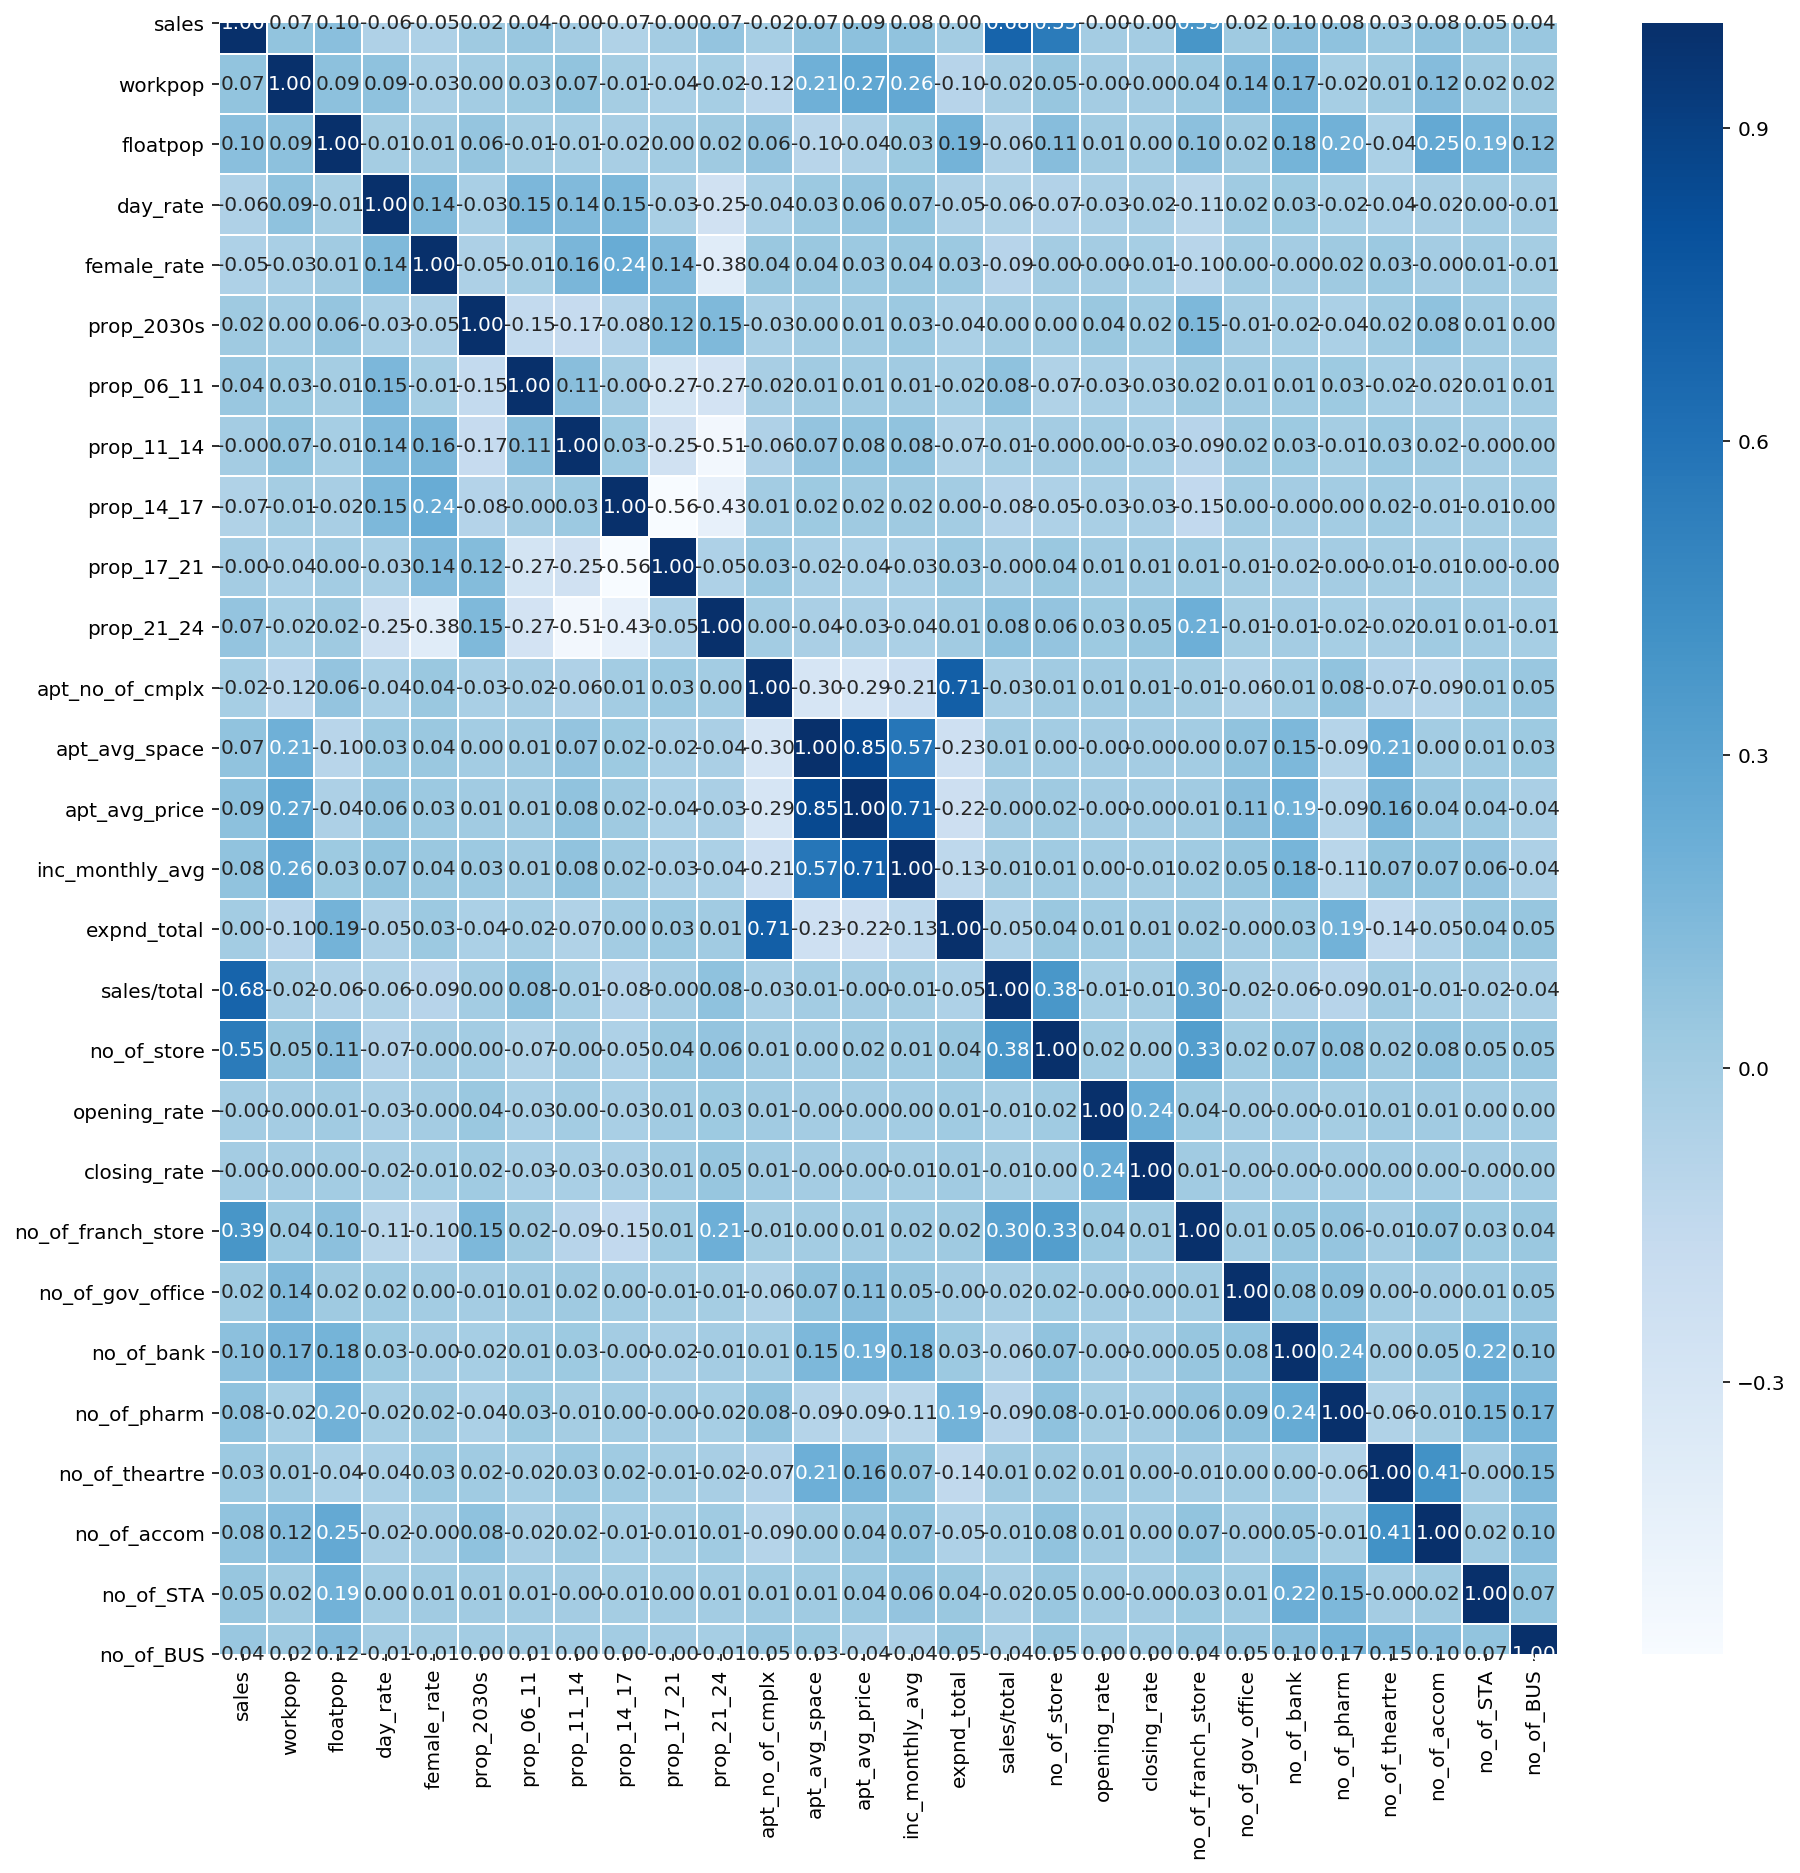

In [22]:
#상관관계 분석
# 결과: 점포당 매출액과 큰 상관관계를 가지는 변수를 찾기 어렵다
# 그나마 상권별 특화되어있는 서비스의 강도(해당 서비스업종의 매출액이 해당 상권의 총 매출액에서 차지하는 비율)이 높은 상관관계를 가진다
plt.figure(figsize=(15,15))
sns.heatmap(data = df1.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
# sns.heatmap(data = df2.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

#### 상관관계 분석 결과
- 매출액 총합(sales)이 점포당매출액(sales/total)보다 다른변수와 상관관계가 있다
- 전체적으로 변수끼리 상관관계가 크게 없다.
- 하지만 분포를 보고 log값을 취해줄 것이 있는지 확인하고, 비선형적인 상관관계가 있는지 확인하기 위해 부분회귀분석을 실시해보겠다

### 부분회귀분석

In [38]:
#OLS에서 이름때문에 에러떠서 이름변경
df1.columns=['sales', 'workpop', 'floatpop', 'day_rate', 'female_rate', 'prop_2030s',
       'prop_06_11', 'prop_11_14', 'prop_14_17', 'prop_17_21', 'prop_21_24',
       'apt_no_of_cmplx', 'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg',
       'expnd_total', 'sales_total', 'no_of_store', 'opening_rate',
       'closing_rate', 'no_of_franch_store', 'no_of_gov_office', 'no_of_bank',
       'no_of_pharm', 'no_of_theartre', 'no_of_accom', 'no_of_STA',
       'no_of_BUS']

In [41]:
import statsmodels.api as sm
model= sm.OLS.from_formula("sales ~ "+" + ".join(df1.columns[1:]), data=df1)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     5146.
Date:                Sat, 14 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:12:39   Log-Likelihood:            -1.8691e+06
No. Observations:               89020   AIC:                         3.738e+06
Df Residuals:                   88992   BIC:                         3.738e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.441e+08   1.62

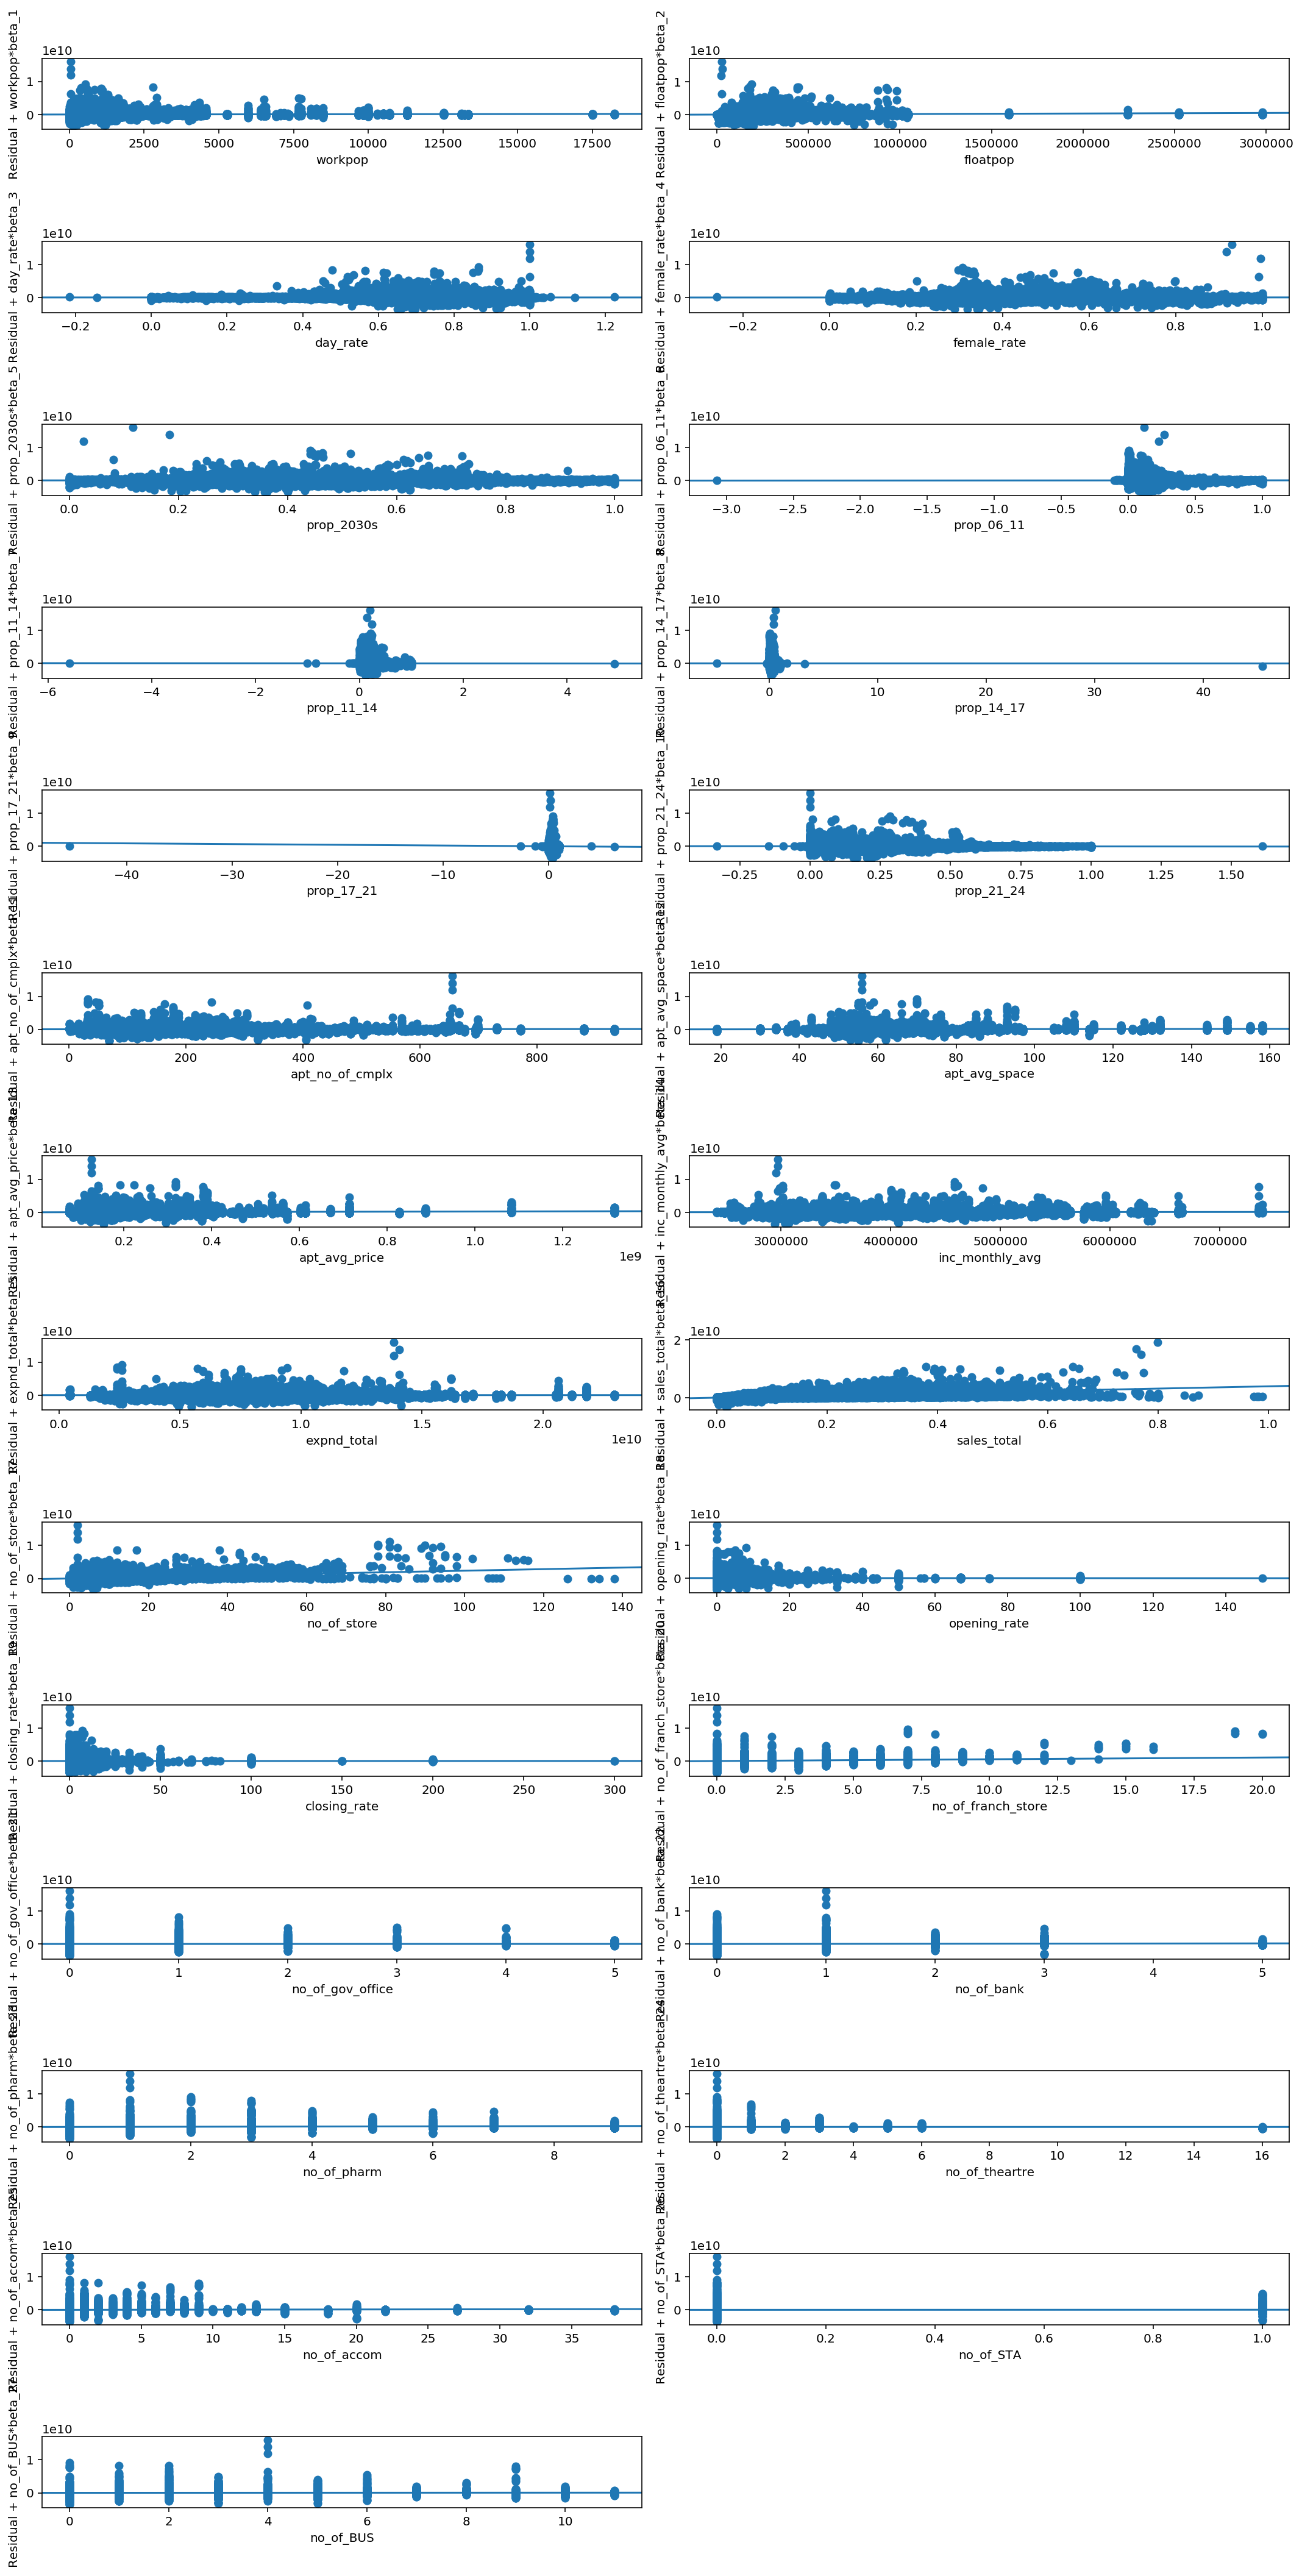

In [42]:
##부분회귀분석 :CCPR플롯으로 표현
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 30))
sm.graphics.plot_ccpr_grid(result, fig=fig)
fig.suptitle("")
plt.show()

##### OLS 결과 다중공선성 발생, 스케일링 필요
##### prop_2030s, prop_06_11, prop_11_14 prop_14_17,expnd_total,closing_rate, no_of_theartre =>pvalue 값 높음(유의하지 않음)
#####  prop 변수들은 값이 뭉쳐있음 ->log값 취할필요 있음

In [68]:
#Robust Scaling 한 후 OLS

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

rb = RobustScaler()
# rb = StandardScaler()
rb.fit(df1)
df_robust_scaled = rb.transform(df1)
df_robust_scaled = pd.DataFrame(df_robust_scaled, columns=df1.columns)
df_robust_scaled

model = sm.OLS.from_formula("sales ~ "+" + ".join(df_robust_scaled.columns[1:]), data=df_robust_scaled)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     5146.
Date:                Sat, 14 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:51:17   Log-Likelihood:            -1.5922e+05
No. Observations:               89020   AIC:                         3.185e+05
Df Residuals:                   88992   BIC:                         3.188e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2909      0

#### 스케일링 하기
- log값 취해서 pvalue가 유의미해진 컬럼은 log값 취하기
- Standard Scaling (음의 왜도가 심한 변수는 log값 취했기 때문에 Standard Scaling 사용가능)
- Robust Scaling (그래도 음의왜도로 치우쳐져있는 변수들이 있어 시도하는것이 필요)

In [123]:
# df1.to_csv("df1.csv", sep=",", encoding = 'euc-kr', index=False)

In [6]:
df1_scale=df1.copy()
# df1_scale.columns

In [7]:
# 로그 취하기
df1_scale['log_DayWeekend']=np.log(df1['DayWeekend'])
df1_scale['log_FemaleMaleend']=np.log(df1['FemaleMale'])
df1_scale['log_Fourteen17']=np.log(df1['Fourteen17'])
df1_scale=df1_scale[['log_DayWeekend', 'log_FemaleMaleend', 'Twenty_30', 'Six_11',
       'Eleven14',  'log_Fourteen17', 'Seventeen21', 'Twentyone24', 'AptNum',
       'AptArea', 'AptPrice', 'MonthlyIncome', 'Consume', 'ServiceSale',
       'StoreNum']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [47]:
#Standard Scaling 한 후 OLS
#다중공선성, 스케일링 문제 해결
#낮은 R-Square값 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

dfX=df1_scale
# rb = RobustScaler()
rb = StandardScaler()
rb.fit(dfX)
X_standard_scaled = rb.transform(dfX)
dfX2=pd.DataFrame(X_standard_scaled, columns= df1_scale.columns)
df1_standard_scaled = pd.concat([df2, dfX2], axis=1)

model = sm.OLS.from_formula("SalesPerStore  ~"+"+".join(df1_standard_scaled[df1_standard_scaled.columns[3:]]), data=df1_standard_scaled)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          SalesPerStore   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     1487.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:32:33   Log-Likelihood:            -9.7860e+05
No. Observations:               49404   AIC:                         1.957e+06
Df Residuals:                   49388   BIC:                         1.957e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.262e+07   4.36e+0

In [12]:
#Robust Scaling 한 후 OLS
#다중공선성, 스케일링 문제 해결
#StandardScaler한 것과 비슷한 R-Square값. 그러나 여전히 낮음 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

dfX=df1_scale
rb = RobustScaler()
# rb = StandardScaler()
rb.fit(dfX)
X_robust_scaled = rb.transform(dfX)
dfX2=pd.DataFrame(X_robust_scaled, columns= df1_scale.columns)
df1_robust_scaled = pd.concat([df2, dfX2], axis=1)

model = sm.OLS.from_formula("SalesPerStore  ~"+"+".join(df1_robust_scaled[df1_robust_scaled.columns[3:]]), data=df1_robust_scaled)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          SalesPerStore   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     1487.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:56:39   Log-Likelihood:            -9.7860e+05
No. Observations:               49404   AIC:                         1.957e+06
Df Residuals:                   49388   BIC:                         1.957e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.478e+07   6.21e+0

#### 상권코드와 서비스 코드 넣어서 분석해보기

In [13]:
#상권코드 더미변수로 추가, Robust Scaling 한 후 OLS
#다중공선성 문제 발생
#R2값 상승 (0.311-> 0.445)
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

dfX=df1_scale
rb = RobustScaler()
# rb = StandardScaler()
rb.fit(dfX)
X_robust_scaled = rb.transform(dfX)
dfX2=pd.DataFrame(X_robust_scaled, columns= df1_scale.columns)
df1_robust_scaled = pd.concat([df2, dfX2], axis=1)

# model = sm.OLS.from_formula("SalesPerStore  ~ C(Code) +"+"+".join(df1_robust_scaled[df1_robust_scaled.columns[3:]]), data=df1_robust_scaled)
# result = model.fit()
# print(result.summary())

```
                     OLS Regression Results                            
==============================================================================
Dep. Variable:          SalesPerStore   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     38.13
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:54:35   Log-Likelihood:            -9.7324e+05
No. Observations:               49404   AIC:                         1.949e+06
Df Residuals:                   48384   BIC:                         1.957e+06
Df Model:                        1019                                         
Covariance Type:            nonrobust                                         
======================================================================================
- 상권 코드 결과 중략
log_DayWeekend     -3.237e+06   4.18e+05     -7.751      0.000   -4.06e+06   -2.42e+06
log_FemaleMaleend  -2.324e+06   5.77e+05     -4.027      0.000   -3.46e+06   -1.19e+06
Twenty_30           2.356e+06   5.32e+05      4.425      0.000    1.31e+06     3.4e+06
Six_11              1.106e+07   7.62e+05     14.524      0.000    9.57e+06    1.26e+07
Eleven14            -3.88e+06   7.57e+05     -5.126      0.000   -5.36e+06    -2.4e+06
log_Fourteen17      6.027e+06   7.15e+05      8.425      0.000    4.63e+06    7.43e+06
Seventeen21        -6.028e+06   7.63e+05     -7.897      0.000   -7.52e+06   -4.53e+06
Twentyone24        -4.326e+05   1.31e+06     -0.330      0.742   -3.01e+06    2.14e+06
AptNum              3.116e+06   5.43e+06      0.574      0.566   -7.52e+06    1.38e+07
AptArea            -1.684e+06   6.85e+06     -0.246      0.806   -1.51e+07    1.17e+07
AptPrice            9.842e+06   1.12e+07      0.877      0.381   -1.22e+07    3.18e+07
MonthlyIncome       2.857e+06   1.91e+07      0.149      0.881   -3.46e+07    4.04e+07
Consume             1.949e+06   3.37e+06      0.578      0.564   -4.66e+06    8.56e+06
ServiceSale         5.752e+07   3.51e+05    163.817      0.000    5.68e+07    5.82e+07
StoreNum           -3.056e+07   3.24e+05    -94.361      0.000   -3.12e+07   -2.99e+07
==============================================================================
Omnibus:                    76854.852   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        192726344.493
Skew:                           9.305   Prob(JB):                         0.00
Kurtosis:                     308.415   Cond. No.                     2.09e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.48e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
```

In [56]:
#서비스 코드더미변수로 추가, Robust Scaling 한 후 OLS
#미추가 OLS보다 R2값 상승 (0.311-> 0.382)
#상권코드 포함한 OLS모델보다 R2값 하락(0.445->0.382)
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

dfX=df1_scale
rb = RobustScaler()
# rb = StandardScaler()
rb.fit(dfX)
X_robust_scaled = rb.transform(dfX)
dfX2=pd.DataFrame(X_robust_scaled, columns= df1_scale.columns)
df1_robust_scaled = pd.concat([df2, dfX2], axis=1)

model = sm.OLS.from_formula("SalesPerStore  ~ C(ServiceCode) +"+"+".join(df1_standard_scaled[df1_standard_scaled.columns[3:]]), data=df1_robust_scaled)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          SalesPerStore   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     516.0
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:42:32   Log-Likelihood:            -9.7593e+05
No. Observations:               49404   AIC:                         1.952e+06
Df Residuals:                   49344   BIC:                         1.953e+06
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
# 시간나면 시도) 파이프라인으로 scaling과 regression 묶기
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression

# model = Pipeline([
#     ('scaler', StandardScaler()),
#     ('regressor', LinearRegression()),
# ])

### 소결론   
- 처음에 시도한 변수들은 p-value값이 모두 유의미하게 나왔지만 R-Square(이하 R2)값이 높지 않았다.
- 서비스 업종 코드를 추가하니  R2값 상승 (0.311-> 0.382)
- 상권코드를 추가하니(서비스 업종코드 제외) R2값 상승 (0.311-> 0.445)
    - 가장 높은 R2값이나 다중공선성 발생
- 따라서 KNN을 통해 상권코드를 군집화하고 OLS회귀분석을 하여 모델링할 계획

#### 상권코드 KNN 실시
- (자세한 내용은 09_KNN.ipynb를 참고해주세요)
- 아래의 내용은 오류를 해결해보기 위한 저만의 노력인데, 유의미한 노력은 아닌것 같습니다.

In [122]:
# df2.to_csv("df2.csv", sep=",", encoding = 'euc-kr', index=False)
# dfX2.to_csv("dfX2.csv", sep=",", encoding = 'euc-kr', index=False)

In [91]:
# 상권코드를 0~1007 사이의 숫자로 변환
Code_df=pd.DataFrame(df2['Code'])

a=df2['Code'].unique()
a_result=[]
idx=np.arange(len(a))
for i,a in zip(idx,a):
    a_result.append([i,a])
code_index=pd.DataFrame(np.array(a_result))
code_index.columns=['code_trans','Code']
Code_trans=pd.merge(Code_df,code_index, on=['Code'])
Code_trans.tail(1)

,Code,code_trans
49414,1001010,1007


In [115]:
len(Code_trans['code_trans'].values)
# dfX2.values

49415

In [127]:
# from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# X = dfX2.values
# # y= Code_trans['code_trans'].values
# y= Code_trans['code_trans'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.7, random_state=42)
# nca = NeighborhoodComponentsAnalysis(random_state=42)
# knn = KNeighborsClassifier(n_neighbors=3)
# nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
# nca_pipe.fit(X_train, y_train)

# print(nca_pipe.score(X_test, y_test))